# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from cs231n.classifiers.neural_net import TwoLayerNet, TwoLayerNet_Pytorch

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

def rel_error_torch(x, y):
    return torch.max(torch.abs(x-y).double() / torch.max(torch.tensor([1e-8], dtype=torch.float64), torch.abs(x) + torch.abs(y)))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

# ============================
def init_toy_model_torch():
    #torch.manual_seed(0)
    np.random.seed(0)
    return TwoLayerNet_Pytorch(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data_torch():
    #torch.manual_seed(1)
    np.random.seed(1)
    #X = 10 * torch.randn(num_inputs, input_size)
    X = torch.from_numpy(10 * np.random.randn(num_inputs, input_size))
    y = torch.tensor([0, 1, 2, 2, 1])
    return X, y

net_torch = init_toy_model_torch()
X_torch, y_torch = init_toy_data_torch()
# ============================

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


## Pytorch 实现

In [4]:
scores_torch = net_torch.loss(X_torch)
print('Your scores:')
print(scores_torch)
print()
print('correct scores:')
correct_scores_torch = torch.from_numpy(np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]]))
print(correct_scores_torch)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(torch.sum(torch.abs(scores_torch - correct_scores_torch)))

Your scores:
tensor([[-0.8123, -1.2765, -0.7034],
        [-0.1713, -1.1880, -0.4731],
        [-0.5159, -1.0135, -0.8504],
        [-0.1542, -0.4863, -0.5290],
        [-0.0062, -0.1244, -0.1523]], dtype=torch.float64)

correct scores:
tensor([[-0.8123, -1.2765, -0.7034],
        [-0.1713, -1.1880, -0.4731],
        [-0.5159, -1.0135, -0.8504],
        [-0.1542, -0.4863, -0.5290],
        [-0.0062, -0.1244, -0.1523]], dtype=torch.float64)

Difference between your scores and correct scores:
tensor(1.00000e-08 *
       3.6803, dtype=torch.float64)


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [5]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.794120407794253e-13


### Pytroch 实现

In [6]:
loss_torch, __ = net_torch.loss(X_torch, y_torch, reg=0.05)
correct_loss_torch = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(torch.sum(torch.abs(loss_torch - correct_loss_torch)))

Difference between your loss and correct loss:
tensor(1.00000e-13 *
       1.7986, dtype=torch.float64)


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [7]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


### Pytorch 实现

In [8]:
from cs231n.gradient_check import eval_numerical_gradient_torch

loss_torch, grads_torch = net_torch.loss(X_torch, y_torch, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads_torch:
    f = lambda W: net_torch.loss(X_torch, y_torch, reg=0.05)[0]
    param_grad_num_torch = eval_numerical_gradient_torch(f, net_torch.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error_torch(param_grad_num_torch, grads_torch[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 8.372511e-10


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.017149607938732093


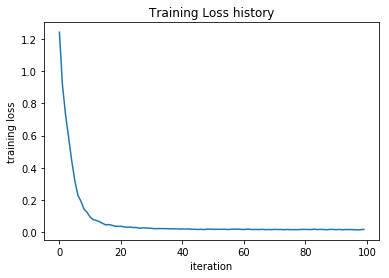

In [9]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

### Pytorch 实现

Final training loss:  0.017149607938732093


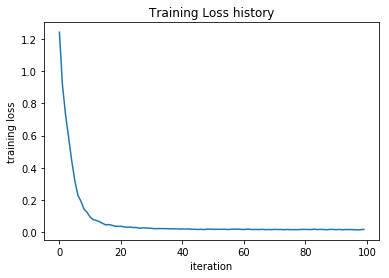

In [10]:
net_torch = init_toy_model_torch()
stats_torch = net_torch.train(X_torch, y_torch, X_torch, y_torch,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [11]:
from cs231n.data_utils import load_CIFAR10

def PCA(X, num_dims):
    cov = np.dot(X.T, X) / len(X)
    U, S, V = np.linalg.svd(cov)
    return np.dot(X, U[:,:num_dims])

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000,
                     use_pca=False, num_dims=100):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
            
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    if use_pca:
        X = np.concatenate((X_train, X_val, X_test), axis=0)
        X = PCA(X, num_dims)
        X_train = X[:num_training, ]
        X_val = X[num_training : num_training + num_validation, ]
        X_test = X[num_training + num_validation:, ]

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
X_train_torch = torch.from_numpy(X_train)
y_train_torch = torch.from_numpy(y_train)
X_val_torch = torch.from_numpy(X_val)
y_val_torch = torch.from_numpy(y_val)
X_test_torch = torch.from_numpy(X_test)
y_test_torch = torch.from_numpy(y_test)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [12]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302961
iteration 100 / 1000: loss 2.302571
iteration 200 / 1000: loss 2.298877
iteration 300 / 1000: loss 2.270062
iteration 400 / 1000: loss 2.202575
iteration 500 / 1000: loss 2.147008
iteration 600 / 1000: loss 2.091755
iteration 700 / 1000: loss 2.053343
iteration 800 / 1000: loss 2.014267
iteration 900 / 1000: loss 1.989783
Validation accuracy:  0.273


### pytorch 实现

In [13]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net_torch = TwoLayerNet_Pytorch(input_size, hidden_size, num_classes)

# Train the network
stats_torch = net_torch.train(X_train_torch, y_train_torch, X_val_torch, y_val_torch,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc_torch = (net_torch.predict(X_val_torch) == y_val_torch).double().mean()
print('Validation accuracy: ', val_acc_torch)

iteration 0 / 1000: loss 2.302968
iteration 100 / 1000: loss 2.302213
iteration 200 / 1000: loss 2.294419
iteration 300 / 1000: loss 2.264243
iteration 400 / 1000: loss 2.213446
iteration 500 / 1000: loss 2.091495
iteration 600 / 1000: loss 2.075548
iteration 700 / 1000: loss 2.066619
iteration 800 / 1000: loss 1.982766
iteration 900 / 1000: loss 2.012352
Validation accuracy:  tensor(0.2790, dtype=torch.float64)


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

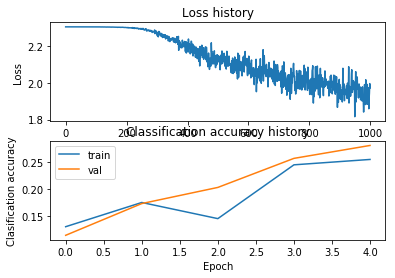

In [14]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

### pytorch 实现

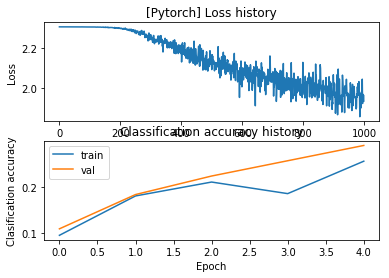

In [15]:
plt.subplot(2, 1, 1)
plt.plot(stats_torch['loss_history'])
plt.title('[Pytorch] Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats_torch['train_acc_history'], label='train')
plt.plot(stats_torch['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

(3072, 50)


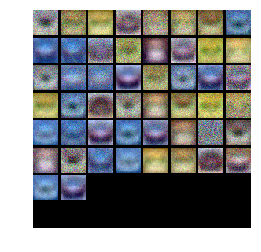

In [16]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net, h=32, w=32):
    W1 = net.params['W1']
    print(W1.shape)
    W1 = W1.reshape(h, w, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [17]:
# I'm going to get the data but this time performing PCA.
num_dims= 16 * 16 * 3
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data(use_pca=True, num_dims=num_dims)
X_train_torch = torch.from_numpy(X_train)
y_train_torch = torch.from_numpy(y_train)
X_val_torch = torch.from_numpy(X_val)
y_val_torch = torch.from_numpy(y_val)
X_test_torch = torch.from_numpy(X_test)
y_test_torch = torch.from_numpy(y_test)

In [18]:
input_size = num_dims
num_classes = 10
hidden_sizes = [10, 50, 100, 200, 500, 700]
learning_rates = [1e-1, 1e-2, 1e-3, 1e-5]
regs = [5e-1, 5, 5e1]
best_net = None
best_val_acc = -1
best_params = {}

for hidden_size in hidden_sizes:
    for lr in learning_rates:
        for reg in regs:
            print("The lr: %e " % (lr))
            print("The best reg: %e" % (reg))
            print("The best hidden size: %d" % (hidden_size))
            net = TwoLayerNet(input_size, hidden_size, num_classes)
            result = net.train(X_train, y_train, X_val, y_val, learning_rate=lr, 
                               reg=reg, num_iters=20000, batch_size=200, 
                               learning_rate_decay=0.95,verbose=False)
            y_pred = net.predict(X_val)
            val_acc = np.mean(y_pred == y_val)
            print("The validation accuracy is: %s " % (val_acc))
            print('----------')
            if  val_acc > best_val_acc:
                best_val_acc = val_acc
                best_net = net
                best_params['lr'] = lr
                best_params['reg'] = reg
                best_params['hidden_size'] = hidden_size
                best_result = result
                
print("The best validation accuracy is: %s " % (best_val_acc))
print("The best lr: %e " % (best_params['lr']))
print("The best reg: %e" % (best_params['reg']))
print("The best hidden size: %d" % (best_params['hidden_size']))

The lr: 1.000000e-01 
The best reg: 5.000000e-01
The best hidden size: 10


/home/wilson/git/cs231n/assignment1/cs231n/classifiers/neural_net.py:84: RuntimeWarning: overflow encountered in subtract
  scores -= np.max(scores, axis=1)[ :, np.newaxis]
/home/wilson/git/cs231n/assignment1/cs231n/classifiers/neural_net.py:84: RuntimeWarning: invalid value encountered in subtract
  scores -= np.max(scores, axis=1)[ :, np.newaxis]
/home/wilson/.local/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/wilson/.local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/wilson/git/cs231n/assignment1/cs231n/classifiers/neural_net.py:97: RuntimeWarning: invalid value encountered in greater
  dHidden = dHidden * (hidden > 0)


The validation accuracy is: 0.087 
----------
The lr: 1.000000e-01 
The best reg: 5.000000e+00
The best hidden size: 10


/home/wilson/git/cs231n/assignment1/cs231n/classifiers/neural_net.py:102: RuntimeWarning: overflow encountered in multiply
  loss += reg * (np.sum(W1 * W1) + np.sum(W2 * W2))


The validation accuracy is: 0.087 
----------
The lr: 1.000000e-01 
The best reg: 5.000000e+01
The best hidden size: 10
The validation accuracy is: 0.087 
----------
The lr: 1.000000e-02 
The best reg: 5.000000e-01
The best hidden size: 10
The validation accuracy is: 0.087 
----------
The lr: 1.000000e-02 
The best reg: 5.000000e+00
The best hidden size: 10
The validation accuracy is: 0.087 
----------
The lr: 1.000000e-02 
The best reg: 5.000000e+01
The best hidden size: 10


/home/wilson/git/cs231n/assignment1/cs231n/classifiers/neural_net.py:102: RuntimeWarning: overflow encountered in double_scalars
  loss += reg * (np.sum(W1 * W1) + np.sum(W2 * W2))


The validation accuracy is: 0.087 
----------
The lr: 1.000000e-03 
The best reg: 5.000000e-01
The best hidden size: 10
The validation accuracy is: 0.438 
----------
The lr: 1.000000e-03 
The best reg: 5.000000e+00
The best hidden size: 10
The validation accuracy is: 0.378 
----------
The lr: 1.000000e-03 
The best reg: 5.000000e+01
The best hidden size: 10
The validation accuracy is: 0.186 
----------
The lr: 1.000000e-05 
The best reg: 5.000000e-01
The best hidden size: 10
The validation accuracy is: 0.191 
----------
The lr: 1.000000e-05 
The best reg: 5.000000e+00
The best hidden size: 10
The validation accuracy is: 0.185 
----------
The lr: 1.000000e-05 
The best reg: 5.000000e+01
The best hidden size: 10
The validation accuracy is: 0.147 
----------
The lr: 1.000000e-01 
The best reg: 5.000000e-01
The best hidden size: 50
The validation accuracy is: 0.087 
----------
The lr: 1.000000e-01 
The best reg: 5.000000e+00
The best hidden size: 50
The validation accuracy is: 0.087 
-----

### pytorch实现

In [19]:
hidden_sizes_torch = [700]
learning_rates_torch = [1e-3]
regs_torch = [5e-1]
best_net_torch = None
best_val_acc_torch = -1
best_params_torch = {}

for hidden_size in hidden_sizes_torch:
    for lr in learning_rates_torch:
        for reg in regs_torch:
            print("The lr: %e " % (lr))
            print("The best reg: %e" % (reg))
            print("The best hidden size: %d" % (hidden_size))
            net_torch = TwoLayerNet_Pytorch(input_size, hidden_size, num_classes)
            result_torch = net_torch.train(X_train_torch, y_train_torch, X_val_torch, y_val_torch, learning_rate=lr, 
                               reg=reg, num_iters=20000, batch_size=200, 
                               learning_rate_decay=0.95,verbose=False)
            y_pred_torch = net_torch.predict(X_val_torch)
            val_acc_torch = (y_pred_torch == y_val_torch).double().mean()
            print("The validation accuracy is: %s " % (val_acc_torch))
            print('----------')
            if  val_acc_torch > best_val_acc_torch:
                best_val_acc_torch = val_acc_torch
                best_net_torch = net_torch
                best_params_torch['lr'] = lr
                best_params_torch['reg'] = reg
                best_params_torch['hidden_size'] = hidden_size
                best_result_torch = result_torch
                
print("The best validation accuracy is: %s " % (best_val_acc_torch))
print("The best lr: %e " % (best_params_torch['lr']))
print("The best reg: %e" % (best_params_torch['reg']))
print("The best hidden size: %d" % (best_params_torch['hidden_size']))

The lr: 1.000000e-03 
The best reg: 5.000000e-01
The best hidden size: 700
The validation accuracy is: tensor(0.5610, dtype=torch.float64) 
----------
The best validation accuracy is: tensor(0.5610, dtype=torch.float64) 
The best lr: 1.000000e-03 
The best reg: 5.000000e-01
The best hidden size: 700


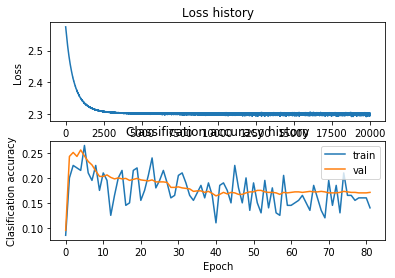

In [20]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(result['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(result['train_acc_history'], label='train')
plt.plot(result['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

(768, 700)


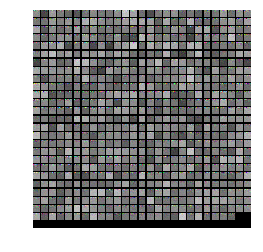

In [21]:
# visualize the weights of the best network
show_net_weights(best_net, h=16, w =16)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [22]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.568


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer*:

*Your explanation:*